#Data Pre-Processing

##Declare global variables

##Read in Data from file "PPR-ALL.csv"

In [142]:
#Static variables
FOLDER = "..\RawDatasets"
FOLDER_PRO = "..\ProcessedDatasets"
fn1 = "\Export.json"
fn2 = "\PPR-ALL.csv"
fn3 = "\pro_dataset.csv"
fp1 = FOLDER + fn1
fp2 = FOLDER + fn2
fp3 = FOLDER_PRO + fn3

##Imports
###List of imports: pandas, numpy ,os, matplotlib

In [134]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import os
os.getcwd()

'c:\\Users\\SKy\\GitRepos\\Project1-HousePricePrediction\\DataPreprocessing'

##Read in Data from file "PPR-ALL.csv" into Pandas DataFrame encoding="ANSI"

In [50]:
df = pd.read_csv(fp2, encoding='ANSI',engine='python',dtype={'Address': str})


##Exploring the data

In [51]:
#Head of the data first 5 rows
df.head()

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,"€343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"€185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,"€438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,"€400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,"€160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [52]:
#Tail of the data last 5 rows
df.tail()

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
624072,06/10/2023,"ROSE COTTAGE, KNOCKAUNARAST, BALLYSAGGART",Waterford,P51A091,"€325,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
624073,06/10/2023,"SAUNDERS COURT, MULLINGAR, WESTMEATH",Westmeath,NaN,"€250,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
624074,06/10/2023,"THE GREEN, FETHARD, CO TIPPERARY",Tipperary,NaN,"€66,000.00",Yes,No,Second-Hand Dwelling house /Apartment,NaN
624075,06/10/2023,"THREE CASTLES, MANOR KILBRIDE, BLESSINGTON",Wicklow,W91E2V8,"€370,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
624076,06/10/2023,"TUREEN, WALSH ISLAND, TULLAMORE",Offaly,R35YX39,"€325,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [53]:
#Basic Info on Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624077 entries, 0 to 624076
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Date of Sale (dd/mm/yyyy)  624077 non-null  object
 1   Address                    624077 non-null  object
 2   County                     624077 non-null  object
 3   Eircode                    112792 non-null  object
 4   Price (€)                  624077 non-null  object
 5   Not Full Market Price      624077 non-null  object
 6   VAT Exclusive              624077 non-null  object
 7   Description of Property    624077 non-null  object
 8   Property Size Description  52819 non-null   object
dtypes: object(9)
memory usage: 42.9+ MB


In [54]:
#Gives count of, unique values, top, and freq
df.describe()

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
count,624077,624077,624077,112792,624077,624077,624077,624077,52819
unique,4756,564932,26,110330,36217,2,2,5,6
top,22/12/2014,"Broomfield, Midleton",Dublin,A96WV79,"€150,000.00",No,No,Second-Hand Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
freq,1542,21,196273,8,7712,593703,522782,520788,38089


##Read in Data from file "PPR-ALL.csv" into Pandas DataFrame encoding="ANSI"

In [55]:
df2 = pd.read_json(fp1)

##Explore data

In [56]:
df2.head()

,PublicationDate,Xitm,Yitm,Valuation,Address2,Address3,Address1,ValuationReport,County,CarPark,Eircode,Address4,Address5,PropertyNumber,LocalAuthority,Uses,Category
0,05/09/2023,643404.60,752929.99,7480.0,21-23 (lot 40-43) Dominick Street,Mullingar,Floor 1,"[{'Area': 99.84, 'Nav': 7488.0, 'FloorUse': 'O...",WESTMEATH,0,N91TV04,Co Westmeath,None,10028467,WESTMEATH COUNTY COUNCIL,OFFICE (OVER THE SHOP),OFFICE
1,15/09/2017,650288.32,656184.46,6280.0,Kilkenny,Co Kilkenny,23To29 Black Abbey Street,"[{'Area': 209.5, 'Nav': 6285.0, 'FloorUse': 'W...",KILKENNY,0,R95AE72,None,None,76445,KILKENNY COUNTY COUNCIL,"-, WAREHOUSE",INDUSTRIAL USES
2,15/09/2017,650372.80,656219.29,520.0,Kilkenny,Co Kilkenny,"5,7A Black Abbey Street","[{'Area': 105.0, 'Nav': 525.0, 'FloorUse': 'YA...",KILKENNY,0,NM,None,None,76431,KILKENNY COUNTY COUNCIL,"-, YARD",INDUSTRIAL USES
3,15/09/2017,650173.54,656115.32,20000.0,Kilkenny,Co Kilkenny,37 Blackmill Street,"[{'Area': 1.0, 'Nav': 20000.0, 'FloorUse': 'ES...",KILKENNY,0,R95EEX0,None,None,76506,KILKENNY COUNTY COUNCIL,"-, PUB",HOSPITALITY
4,15/09/2017,650455.89,655919.08,16310.0,Kilkenny,Co Kilkenny,4-18 (Incl 5-19 Colliers Lane) Chapel Lane,"[{'Area': 11.86, 'Nav': 53.37, 'FloorUse': 'CA...",KILKENNY,0,NM,None,None,76576,KILKENNY COUNTY COUNCIL,"-, WAREHOUSE",INDUSTRIAL USES


In [57]:
df2.tail()

,PublicationDate,Xitm,Yitm,Valuation,Address2,Address3,Address1,ValuationReport,County,CarPark,Eircode,Address4,Address5,PropertyNumber,LocalAuthority,Uses,Category
105499,22/04/2023,712859.81,731180.19,19880.0,Armagh Road,Crumlin,Crumlin Primary Care Centre,"[{'Area': 46.93, 'Nav': 11732.5, 'FloorUse': '...",DUBLIN,0,D12F6C5,Dublin 12,None,5027914,DUBLIN CITY COUNCIL,"-, CAFE",RETAIL (SHOPS)
105500,22/04/2023,715696.27,733137.22,6930.0,80 Harcourt Street,Dublin 2.,Basement,"[{'Area': 77.0, 'Nav': 6930.0, 'FloorUse': 'ST...",DUBLIN,0,D02F449,None,None,5028437,DUBLIN CITY COUNCIL,"OFFICE (2ND GENERATION), OFFICE (GEORGIAN / VI...",OFFICE
105501,22/04/2023,715696.27,733137.22,12530.0,80 Harcourt Street,Dublin 2.,Pt First Floor,"[{'Area': 69.66, 'Nav': 12538.8, 'FloorUse': '...",DUBLIN,0,D02F449,None,None,5028439,DUBLIN CITY COUNCIL,"OFFICE (2ND GENERATION), OFFICE (GEORGIAN / VI...",OFFICE
105502,21/04/2023,715215.49,734255.91,5940.0,Equity House,16/17 Ormond Quay Upper,Third Floor (rear),"[{'Area': 84.92, 'Nav': 5944.4, 'FloorUse': 'O...",DUBLIN,0,D07KR59,Dublin 1.,None,5028443,DUBLIN CITY COUNCIL,"VACANT, OFFICE (GEORGIAN / VICTORIAN)",OFFICE
105503,27/08/2023,643622.40,752926.53,3160.0,BLACKHALL STREET,MULLINGAR,MARY TUNNEY & CO.,"[{'Area': 28.81, 'Nav': 3169.1, 'FloorUse': 'O...",WESTMEATH,0,N91 X2E9,CO. WESTMEATH,None,10028466,WESTMEATH COUNTY COUNCIL,HOUSE,OFFICE


In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105504 entries, 0 to 105503
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PublicationDate  105504 non-null  object 
 1   Xitm             105437 non-null  float64
 2   Yitm             105437 non-null  float64
 3   Valuation        105504 non-null  float64
 4   Address2         103614 non-null  object 
 5   Address3         96595 non-null   object 
 6   Address1         105471 non-null  object 
 7   ValuationReport  105504 non-null  object 
 8   County           105504 non-null  object 
 9   CarPark          105504 non-null  int64  
 10  Eircode          97730 non-null   object 
 11  Address4         44509 non-null   object 
 12  Address5         10523 non-null   object 
 13  PropertyNumber   105504 non-null  int64  
 14  LocalAuthority   105504 non-null  object 
 15  Uses             105504 non-null  object 
 16  Category         105504 non-null  obje

In [59]:
df2.describe()

,Xitm,Yitm,Valuation,CarPark,PropertyNumber
count,1.054370e+05,1.054370e+05,1.055040e+05,1.055040e+05,1.055040e+05
mean,6.590056e+05,7.063148e+05,4.225455e+04,9.063283e+01,1.975741e+06
std,6.102757e+04,7.234108e+04,5.791114e+05,2.906281e+04,1.336282e+06
min,4.528644e+05,4.994011e+05,0.000000e+00,0.000000e+00,7.643100e+04
25%,6.087822e+05,6.562357e+05,4.150000e+03,0.000000e+00,1.023615e+06
50%,6.804616e+05,7.314710e+05,9.940000e+03,0.000000e+00,1.989466e+06
75%,7.130088e+05,7.414277e+05,2.320000e+04,0.000000e+00,2.193735e+06
max,1.114160e+06,4.810151e+06,1.548970e+08,9.440000e+06,1.002848e+07


In [60]:
#Explore the structure of the Valuation Report
df2.loc[0,"ValuationReport"]

[{'Area': 99.84,
  'Nav': 7488.0,
  'FloorUse': 'OFFICE(S)',
  'NavPerM2': 75.0,
  'Level': '1'}]

In [61]:
#Explore the structure of the Valuation Report
df2.loc[4,"ValuationReport"]

[{'Area': 11.86,
  'Nav': 53.37,
  'FloorUse': 'CANOPY',
  'NavPerM2': 4.5,
  'Level': '0'},
 {'Area': 541.99,
  'Nav': 16259.7,
  'FloorUse': 'WAREHOUSE',
  'NavPerM2': 30.0,
  'Level': '0'}]

In [62]:
#Explore breakdown of Residential/Commerical
#There are no residential listing in dataset despite it having that as a Category
df2["Category"].unique()

array(['OFFICE', 'INDUSTRIAL USES', 'HOSPITALITY', 'RETAIL (SHOPS)',
       'MISCELLANEOUS', 'FUEL/DEPOT', 'RETAIL (WAREHOUSE)', 'HEALTH',
       'LEISURE', 'MINERALS', 'NON-LIST', 'CHECK CATEGORY',
       'NO CATEGORY SELECTED', 'CENTRAL VALUATION LIST', 'UTILITY',
       'NON-LIST EXEMPT'], dtype=object)

##Data Cleaning

In [63]:
#Check for null rows - Result : 0
null_rows = df[df.isnull().all(axis=1)]
null_rows.count()

Date of Sale (dd/mm/yyyy)    0
Address                      0
County                       0
Eircode                      0
Price (€)                    0
Not Full Market Price        0
VAT Exclusive                0
Description of Property      0
Property Size Description    0
dtype: int64

In [64]:
#Get count of number rows have 'Not Full Market Price' set to "Yes"
yes_count = (df['Not Full Market Price'] == "Yes").sum()
yes_count

30374

In [65]:
#Get new filtered list with only the Yes values
filtered_df = df[df['Not Full Market Price'] != "No"]

In [66]:
filtered_df['Not Full Market Price'].unique()

array(['Yes'], dtype=object)

In [67]:
#Get index of rows to delete
rows_to_delete = filtered_df.index
rows_to_delete

Index([    41,     48,     69,     89,    101,    116,    123,    129,    144,
          153,
       ...
       623898, 623908, 623966, 623969, 623975, 623976, 624002, 624028, 624034,
       624074],
      dtype='int64', length=30374)

In [68]:
#Use drop method to actually delete
df = df.drop(rows_to_delete)

In [69]:
df['Not Full Market Price'].unique()

array(['No'], dtype=object)

In [70]:
#Check number of properties marked as VAT Exclusive
df[df['VAT Exclusive']=='Yes'].count()

Date of Sale (dd/mm/yyyy)    96506
Address                      96506
County                       96506
Eircode                       2185
Price (€)                    96506
Not Full Market Price        96506
VAT Exclusive                96506
Description of Property      96506
Property Size Description    50308
dtype: int64

In [71]:
#Display rows that have VAT Exclusive == 'Yes'
vat_exclusive = df[df['VAT Exclusive']=='Yes']
vat_exclusive

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"€185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
14,04/01/2010,"25 Lavallin Drive, Whitechurch, Cork",Cork,NaN,"€352,000.00",No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
20,04/01/2010,"48 KILLIANS COURT, MULLAGH",Cavan,NaN,"€122,000.00",No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
21,04/01/2010,"49 ballynakelly green, newcastle",Dublin,NaN,"€499,600.00",No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
28,04/01/2010,"Aughmagree, Kilteevan",Roscommon,NaN,"€215,000.00",No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
...,...,...,...,...,...,...,...,...,...
624038,06/10/2023,"25 River Meadows, Cloughduv",Cork,NaN,"€299,559.00",No,Yes,New Dwelling house /Apartment,NaN
624047,06/10/2023,"37 Meadows Way, Crossneed, Co Laois",Laois,NaN,"€273,127.75",No,Yes,New Dwelling house /Apartment,NaN
624050,06/10/2023,"4 The Close, Vartry Wood, Ashford",Wicklow,NaN,"€466,960.00",No,Yes,New Dwelling house /Apartment,NaN
624055,06/10/2023,"58 Vatry Close, Tinakilly Park, Rathnew",Wicklow,NaN,"€442,477.00",No,Yes,New Dwelling house /Apartment,NaN


In [72]:
#Change data type to correct format
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593703 entries, 0 to 624076
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Date of Sale (dd/mm/yyyy)  593703 non-null  object
 1   Address                    593703 non-null  object
 2   County                     593703 non-null  object
 3   Eircode                    107741 non-null  object
 4   Price (€)                  593703 non-null  object
 5   Not Full Market Price      593703 non-null  object
 6   VAT Exclusive              593703 non-null  object
 7   Description of Property    593703 non-null  object
 8   Property Size Description  51345 non-null   object
dtypes: object(9)
memory usage: 45.3+ MB


In [73]:
#Change Date of Sale
df['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(df['Date of Sale (dd/mm/yyyy)'], format='%d/%m/%Y').dt.strftime('%Y/%m/%d')

In [74]:
#errors='coerce' handles any errors in parsing
df['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(df['Date of Sale (dd/mm/yyyy)'], format='%Y/%m/%d', errors='coerce')


In [75]:
#Rename column
df = df.rename(columns={"Date of Sale (dd/mm/yyyy)":"Date of Sale"})

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593703 entries, 0 to 624076
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date of Sale               593703 non-null  datetime64[ns]
 1   Address                    593703 non-null  object        
 2   County                     593703 non-null  object        
 3   Eircode                    107741 non-null  object        
 4   Price (€)                  593703 non-null  object        
 5   Not Full Market Price      593703 non-null  object        
 6   VAT Exclusive              593703 non-null  object        
 7   Description of Property    593703 non-null  object        
 8   Property Size Description  51345 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 45.3+ MB


In [77]:
#Change Address to str type
df['Address'] = df['Address'].str.strip()
#df['Address'] = df['Address'].astype(str) ##Didn't work for some reason???
df['Address'] = df['Address'].apply(str)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 593703 entries, 0 to 624076
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date of Sale               593703 non-null  datetime64[ns]
 1   Address                    593703 non-null  object        
 2   County                     593703 non-null  object        
 3   Eircode                    107741 non-null  object        
 4   Price (€)                  593703 non-null  object        
 5   Not Full Market Price      593703 non-null  object        
 6   VAT Exclusive              593703 non-null  object        
 7   Description of Property    593703 non-null  object        
 8   Property Size Description  51345 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 45.3+ MB


,Date of Sale,Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,"€343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"€185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,"€438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,2010-01-04,"1 The Haven, Mornington",Meath,NaN,"€400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,2010-01-04,"11 Melville Heights, Kilkenny",Kilkenny,NaN,"€160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [78]:
#Check address for weird values
for val in df['Address']:
    if(type(val) != str):
        print(type(val))


In [79]:
#Remove € from Price column
df['Price (€)'] = df['Price (€)'].str.replace('€', '', regex=False)

In [80]:
#Remove € from Price column
df = df.rename(columns={"Price (€)":"Price"})

In [81]:
#Remove commas
df['Price'] = df['Price'].str.replace(',', '', regex=False)

In [82]:
#Convert Price to float
df['Price'] = df['Price'].astype(float)
df.loc[df['VAT Exclusive'] == "Yes", 'Price']

1         185000.00
14        352000.00
20        122000.00
21        499600.00
28        215000.00
            ...    
624038    299559.00
624047    273127.75
624050    466960.00
624055    442477.00
624057    466960.00
Name: Price, Length: 96506, dtype: float64

In [83]:
# Check if "VAT Exclusive" is "Yes" and update the "Price" column by 13.5%
df.loc[df['VAT Exclusive'] == "Yes", 'Price'] += df.loc[df['VAT Exclusive'] == "Yes", 'Price'] * 0.135

In [85]:
df.loc[df['VAT Exclusive'] == "Yes", 'Price']

1         209975.00000
14        399520.00000
20        138470.00000
21        567046.00000
28        244025.00000
              ...     
624038    339999.46500
624047    309999.99625
624050    529999.60000
624055    502211.39500
624057    529999.60000
Name: Price, Length: 96506, dtype: float64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593703 entries, 0 to 624076
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date of Sale               593703 non-null  datetime64[ns]
 1   Address                    593703 non-null  object        
 2   County                     593703 non-null  object        
 3   Eircode                    107741 non-null  object        
 4   Price                      593703 non-null  float64       
 5   Not Full Market Price      593703 non-null  object        
 6   VAT Exclusive              593703 non-null  object        
 7   Description of Property    593703 non-null  object        
 8   Property Size Description  51345 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 45.3+ MB


In [89]:
#Ok now drop Not Full Market Price, VAT Exclusive Columns
df = df.drop(columns=['VAT Exclusive'])
df = df.drop(columns=['Not Full Market Price'])

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593703 entries, 0 to 624076
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date of Sale               593703 non-null  datetime64[ns]
 1   Address                    593703 non-null  object        
 2   County                     593703 non-null  object        
 3   Eircode                    107741 non-null  object        
 4   Price                      593703 non-null  float64       
 5   Description of Property    593703 non-null  object        
 6   Property Size Description  51345 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 36.2+ MB


#Analysis Description of Property and Property Size Description

In [91]:
#Get unique values
df['Description of Property'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment', 'Teach/Árasán Cónaithe Atháimhe',
       'Teach/Árasán Cónaithe Nua', 'Teach/?ras?n C?naithe Nua'],
      dtype=object)

In [93]:
#Investigate  'Teach/?ras?n C?naithe Nua', 
weird_rows = df[df['Description of Property']=='Teach/?ras?n C?naithe Nua']
weird_rows

,Date of Sale,Address,County,Eircode,Price,Description of Property,Property Size Description
39806,2012-01-12,"Apartment 12 Block B, Corofin House Clare Vi...",Dublin,NaN,130576.075,Teach/?ras?n C?naithe Nua,n?os l? n? 38 m?adar cearnach


In [94]:
#Investigate  'Teach/Árasán Cónaithe Atháimhe', 
second_hand = df[df['Description of Property']=='Teach/Árasán Cónaithe Atháimhe']
second_hand

,Date of Sale,Address,County,Eircode,Price,Description of Property,Property Size Description
1145,2010-02-01,"247 GLANNTAN, GOLF LINKS ROAD, CASTLETROY.",Limerick,NaN,228500.00,Teach/Árasán Cónaithe Atháimhe,NaN
12754,2010-08-20,"8 Millhill Park, Skerries.",Dublin,NaN,320000.00,Teach/Árasán Cónaithe Atháimhe,NaN
17319,2010-11-02,"Carrigvore, Killiskey.",Wicklow,NaN,610000.00,Teach/Árasán Cónaithe Atháimhe,NaN
22673,2011-02-16,"Racecourse Road, Roscommon.",Roscommon,NaN,100000.00,Teach/Árasán Cónaithe Atháimhe,NaN
26813,2011-05-27,"12 Southdene, Gleann Bhaile Na Manach, Baile N...",Dublin,NaN,272000.00,Teach/Árasán Cónaithe Atháimhe,NaN
32224,2011-09-07,"Station road, Castlebellingham, Dundalk.",Louth,NaN,179000.00,Teach/Árasán Cónaithe Atháimhe,NaN
48902,2012-06-28,"7 Thorndale Grove, Artane, Dublin.",Dublin,NaN,250000.00,Teach/Árasán Cónaithe Atháimhe,NaN
54026,2012-09-10,"121 Ardilaun, Portmarnock, Co Dublin.",Dublin,NaN,375000.00,Teach/Árasán Cónaithe Atháimhe,NaN
59663,2012-11-22,"104 Shandon Park, Phibsborough, Dublin 7",Dublin,NaN,290000.00,Teach/Árasán Cónaithe Atháimhe,NaN
61743,2012-12-11,"58 Bunbury Gate Crescent, Swords, Co. Dublin",Dublin,NaN,325000.00,Teach/Árasán Cónaithe Atháimhe,NaN


In [95]:
#Investigate  'Teach/Árasán Cónaithe Atháimhe', 
second_hand = df[df['Description of Property']=='Teach/Árasán Cónaithe Nua']
second_hand

,Date of Sale,Address,County,Eircode,Price,Description of Property,Property Size Description
20133,2010-12-16,"7 Cul Na Toinne, Bunbeg.",Donegal,NaN,85000.00245,Teach/Árasán Cónaithe Nua,níos mó ná nó cothrom le 38 méadar cearnach ag...
127044,2014-10-31,"13 Seachnall Abbey, Dunshaughlin",Meath,NaN,419496.00000,Teach/Árasán Cónaithe Nua,níos mó ná nó cothrom le 38 méadar cearnach ag...
478541,2021-05-24,"19 TUAIRIN, COAST ROAD, ROSCAM",Galway,H91HC9W,358053.34250,Teach/Árasán Cónaithe Nua,NaN


In [97]:
#So replace Irish translations to English
df.loc[df['Description of Property'] == "Teach/Árasán Cónaithe Nua", 'Description of Property'] = "New Dwelling house /Apartment"
df.loc[df['Description of Property'] == "Teach/?ras?n C?naithe Nua", 'Description of Property'] = "New Dwelling house /Apartment"
df.loc[df['Description of Property'] == "Teach/Árasán Cónaithe Atháimhe", 'Description of Property'] = "Second-Hand Dwelling house /Apartment"

In [98]:
#Get unique values
df['Description of Property'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment'], dtype=object)

In [99]:
#Get unique values for Property Size descriptions
df['Property Size Description'].unique()

array([nan,
       'greater than or equal to 38 sq metres and less than 125 sq metres',
       'greater than 125 sq metres', 'less than 38 sq metres',
       'greater than or equal to 125 sq metres',
       'níos mó ná nó cothrom le 38 méadar cearnach agus níos lú ná 125 méadar cearnach',
       'n?os l? n? 38 m?adar cearnach'], dtype=object)

In [100]:
#Translate Irish to English
df.loc[df['Property Size Description'] == "níos mó ná nó cothrom le 38 méadar cearnach agus níos lú ná 125 méadar cearnach", 'Property Size Description'] = "greater than or equal to 38 sq metres and less than 125 sq metres"

In [101]:
#Drop junk row
df = df[df['Property Size Description'] != 'n?os l? n? 38 m?adar cearnach']

In [102]:
#Now check unique values
df['Property Size Description'].unique()

array([nan,
       'greater than or equal to 38 sq metres and less than 125 sq metres',
       'greater than 125 sq metres', 'less than 38 sq metres',
       'greater than or equal to 125 sq metres'], dtype=object)

In [108]:
#Confirm only new builds have Size Descriptions
#Get value counts for Property Descriptions
property_description_counts = df['Description of Property'].value_counts().reset_index()
property_description_counts.columns = ['Description of Property', 'Count']
property_description_counts

#new_builds = df[df['Description of Property']=='New Dwelling house /Apartment']

#count_with_size = df[new_builds & df['Property Size Description'].notnull()].count()
#count_without_size = df[new_builds & df['Property Size Description'].isnull()].count()

##print(count_with_size)
##print(count_without_size)


,Description of Property,Count
0,Second-Hand Dwelling house /Apartment,495568
1,New Dwelling house /Apartment,98134


In [127]:
#Try group together  - Only new builds have Property Size Descriptions
#Select only two columns
filtered_cols = df.loc[:,['Description of Property', "Property Size Description"]]
grouped_counts = df.groupby(['Description of Property', 'Property Size Description']).size().reset_index(name='Count')
grouped_counts
#grouped_counts.columns = ['Description of Property', "Property Size Description",'Count']
#grouped_counts

,Description of Property,Property Size Description,Count
0,New Dwelling house /Apartment,greater than 125 sq metres,6747
1,New Dwelling house /Apartment,greater than or equal to 125 sq metres,4531
2,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,36877
3,New Dwelling house /Apartment,less than 38 sq metres,3189


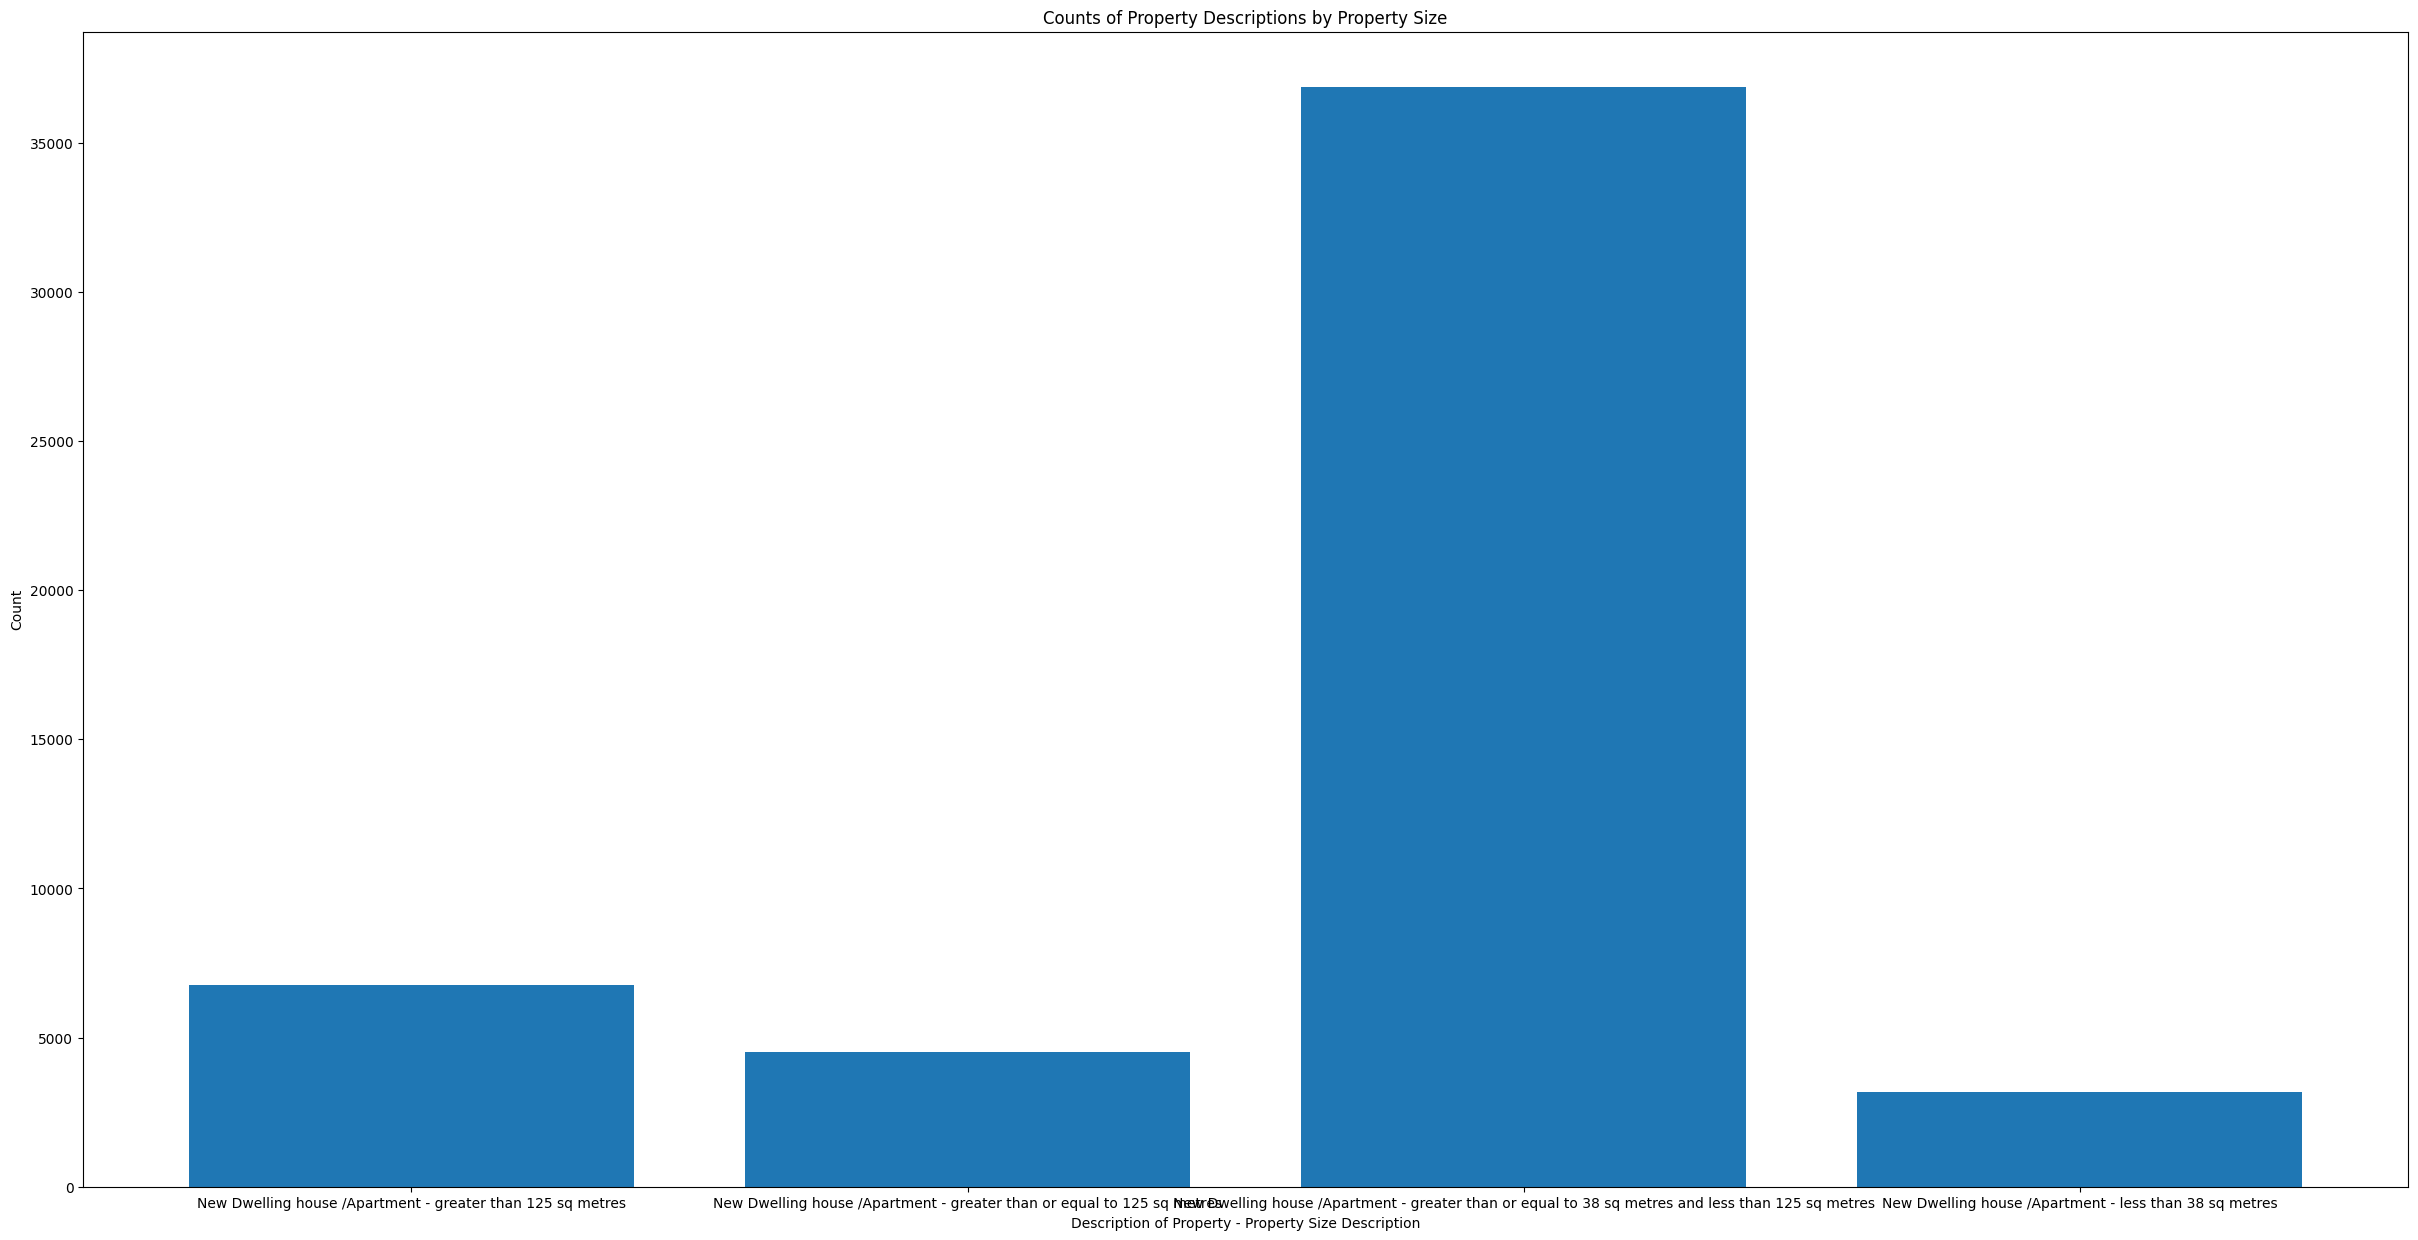

In [139]:
# Create a bar graph
plt.figure(figsize=(30, 15))
plt.bar(grouped_counts['Description of Property'] + ' - ' + grouped_counts['Property Size Description'], grouped_counts['Count'])
plt.xlabel('Description of Property - Property Size Description')
plt.ylabel('Count')
plt.title('Counts of Property Descriptions by Property Size')
plt.show()

In [143]:
#Output changes to csv
df.to_csv(fp3)
df

,Date of Sale,Address,County,Eircode,Price,Description of Property,Property Size Description
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,343000.0,Second-Hand Dwelling house /Apartment,NaN
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,209975.0,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,438500.0,Second-Hand Dwelling house /Apartment,NaN
3,2010-01-04,"1 The Haven, Mornington",Meath,NaN,400000.0,Second-Hand Dwelling house /Apartment,NaN
4,2010-01-04,"11 Melville Heights, Kilkenny",Kilkenny,NaN,160000.0,Second-Hand Dwelling house /Apartment,NaN
...,...,...,...,...,...,...,...
624071,2023-10-06,"MOSSTOWN, KENAGH, LONGFORD",Longford,NaN,150000.0,Second-Hand Dwelling house /Apartment,NaN
624072,2023-10-06,"ROSE COTTAGE, KNOCKAUNARAST, BALLYSAGGART",Waterford,P51A091,325000.0,Second-Hand Dwelling house /Apartment,NaN
624073,2023-10-06,"SAUNDERS COURT, MULLINGAR, WESTMEATH",Westmeath,NaN,250000.0,Second-Hand Dwelling house /Apartment,NaN
624075,2023-10-06,"THREE CASTLES, MANOR KILBRIDE, BLESSINGTON",Wicklow,W91E2V8,370000.0,Second-Hand Dwelling house /Apartment,NaN
